In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-urdu'
MODEL_NAME = 'xlm-roberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
@اناسکر نے آپ کو اپنی نفرت اور حسد کے ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں تک کہ آج بھی بہت سے مسلمان ہیں، یہاں تک کہ عربوں کے ساتھ امن و سلامتی بھی، یہ مذہب ہم پر نہیں ہے۔ 1
@وہن: آپ کو ضرور ضرور کرنا ہوگا! میں نے کرسمس کے ایک شخص کو اس میں سے ایک تھا کہ یہ میرے بیگ میں کئی سال سے نہیں ملا تھا۔ 0
@NNx] ہم ان کے جواب سننے کے لئے انتظار کر رہے ہیں (کہ وہ آپ سے کیا پوچھے گا)۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید ہے کہ اس واقعے اور خاص طور پر یہ خزانہ کامیابی حاصل کرے گا. 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
اناسکر نے آپ کو اپنی نفرت حسد ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں بھی بہت سے مسلمان ہیں، یہاں عربوں ساتھ امن سلامتی بھی، مذہب ہم نہیں ہے۔ 1
وہن آپ کو کرنا ہوگا میں نے کرسمس شخص کو اس میں سے تھا میرے بیگ میں سال سے نہیں ملا تھا۔ 0
nnx ہم ان جواب سننے انتظار کر وہ آپ سے کیا پوچھے گا۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید اس واقعے خاص خزانہ کامیابی حاصل گا 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLMRobertaForSequenceClassification(
  (roberta): XLMRobertaModel(
    (embeddings): XLMRobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): XLMRobertaEncoder(
      (layer): ModuleList(
        (0): XLMRobertaLayer(
          (attention): XLMRobertaAttention(
            (self): XLMRobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): XLMRobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=Tr

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 956/956 [03:35<00:00,  4.44it/s, loss=0.493]


Train loss 0.48308515819919656 accuracy 0.7471467346872037
Validation loss 0.44098175805190515 accuracy 0.7864220543510252
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.7864220543510252
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 956/956 [03:34<00:00,  4.47it/s, loss=0.522]


Train loss 0.4158406604595763 accuracy 0.7969685077994703
Validation loss 0.4333693425296616 accuracy 0.7900519964681645
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.7900519964681645
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 956/956 [03:45<00:00,  4.24it/s, loss=0.309]


Train loss 0.382161080509923 accuracy 0.8179142548808006
Validation loss 0.4421982056108014 accuracy 0.7939272049445698
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.7939272049445698
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 956/956 [03:51<00:00,  4.13it/s, loss=0.278]


Train loss 0.3549585732081944 accuracy 0.833742110598777
Validation loss 0.44831442725508935 accuracy 0.7934857254978908
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 956/956 [03:42<00:00,  4.30it/s, loss=0.181]


Train loss 0.3136045760611485 accuracy 0.8565191798292946
Validation loss 0.4962609737270678 accuracy 0.7851957225546944
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.50it/s, loss=0.162]


Train loss 0.281558213607412 accuracy 0.8742110598776939
Validation loss 0.5146835813981986 accuracy 0.7797017561071323
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 956/956 [03:32<00:00,  4.51it/s, loss=0.101] 


Train loss 0.24336740843733484 accuracy 0.895941659308676
Validation loss 0.581769399321565 accuracy 0.7836750711272442
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 956/956 [03:34<00:00,  4.45it/s, loss=0.0859]


Train loss 0.20692631105841702 accuracy 0.9134536773602799
Validation loss 0.6081974262073869 accuracy 0.7799470224663986
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


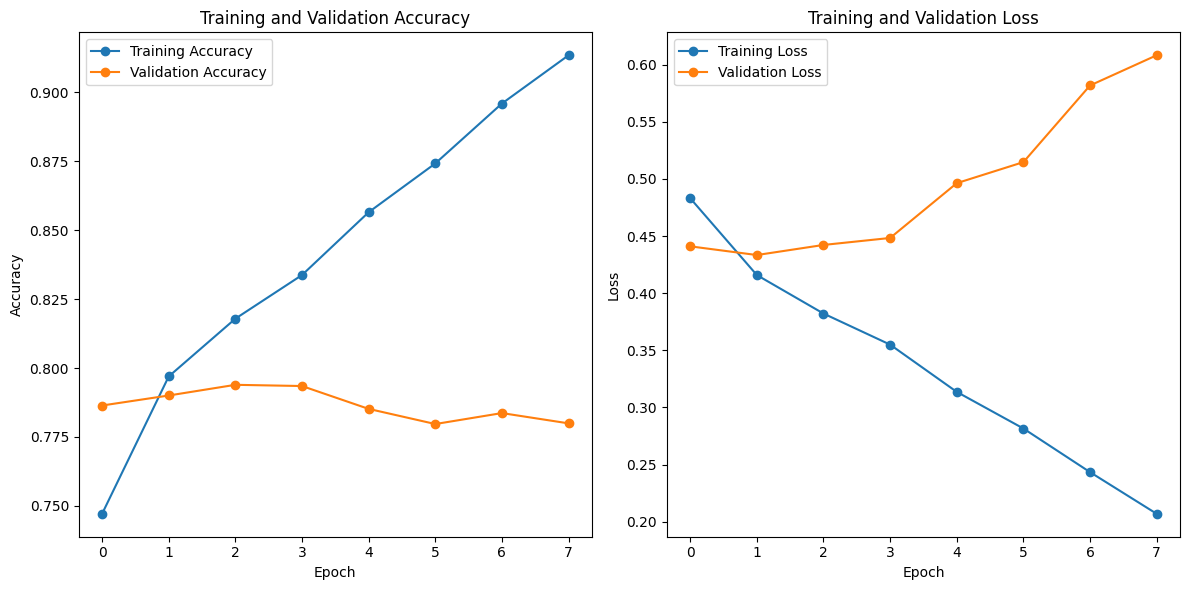

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'../saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7941825673223133 Test Loss: 0.4438400475022187


Accuracy: 0.79
F1 Score: 0.79
Precision: 0.8
Recall: 0.79

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.76      0.81      0.79      9439
        Hate       0.83      0.78      0.80     10948

    accuracy                           0.79     20387
   macro avg       0.79      0.80      0.79     20387
weighted avg       0.80      0.79      0.79     20387



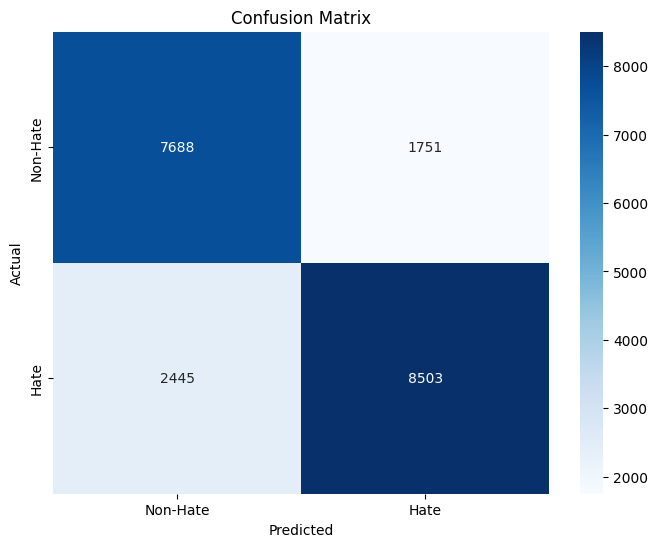

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [13]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Not Hate Speech 
Confidence: 0.57
